## Import required library

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read dataset

In [3]:
dataset = pd.read_csv(r"/content/spam.csv")

In [4]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
dataset.shape

(5572, 5)

## Do pre-processing

In [6]:
# re libarry => regular expression
import re

In [7]:
import nltk

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [9]:
ps = PorterStemmer()

In [12]:
data = []
for i in range(0,5572):
    review = dataset["v2"][i]
    review = review.lower() 
    review = re.sub('[^a-z]'," ",review)
    review =review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    data.append(review)


In [13]:
data

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

### EDA

In [14]:
dataset['v1']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [15]:
dataset['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [16]:
#corpus=" ".join(dataset["Review"])
corpus=" ".join(data)

In [17]:
corpus.split()

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'free',
 'entri',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 'st',
 'may',
 'text',
 'fa',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'freemsg',
 'hey',
 'darl',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 'copi',
 'friend',
 'callertun',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'cl

In [18]:
word_count ={}

for word in corpus.split():
    if word in word_count:
        word_count[word] = word_count[word] +1
    else:
        word_count[word] = 1

In [19]:
top_15_word = pd.Series(corpus.split()).value_counts().head(15)

In [20]:
top_15_word

u       1212
call     693
go       459
get      458
ur       385
gt       318
lt       316
come     302
ok       292
day      291
free     288
know     274
love     260
like     259
time     253
dtype: int64

### convert your text into vectors

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
cv = CountVectorizer(max_features=7000)

In [23]:
x = cv.fit_transform(data).toarray()

In [24]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
type(x)

numpy.ndarray

In [26]:
x.shape

(5572, 6221)

In [27]:
dataset['v1'][0]

'ham'

In [28]:
for i in range(0,5572):
    if dataset['v1'][i]=='ham':
        dataset['v1'][i]=1
    else:
        dataset['v1'][i]=0

In [29]:
y =dataset.iloc[:,:1].values

In [30]:
y = y.astype('int64')

In [31]:
y

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

### split your data

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
x_train.shape

(4457, 6221)

In [34]:
x_test.shape

(1115, 6221)

## Create neural network model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
model = Sequential()

### Add layers

In [37]:
#input layer
model.add(Dense(units=5572,activation='relu',kernel_initializer='random_uniform'))

In [38]:
# multiple hidden layers
model.add(Dense(units=7000,activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(units=7000,activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(units=7000,activation='relu',kernel_initializer='random_uniform'))

In [39]:
#output layer
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='random_uniform'))

## Compile the model

In [40]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Fit the model - Training the model

In [41]:
tr = model.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
140/140 [==============================] - 222s 2s/step - loss: 0.4233 - accuracy: 0.9540
Epoch 2/20
140/140 [==============================] - 222s 2s/step - loss: 0.0092 - accuracy: 0.9980
Epoch 3/20
140/140 [==============================] - 219s 2s/step - loss: 2.1393e-04 - accuracy: 1.0000
Epoch 4/20
140/140 [==============================] - 218s 2s/step - loss: 3.5067e-06 - accuracy: 1.0000
Epoch 5/20
140/140 [==============================] - 219s 2s/step - loss: 1.6513e-06 - accuracy: 1.0000
Epoch 6/20
140/140 [==============================] - 220s 2s/step - loss: 9.8655e-07 - accuracy: 1.0000
Epoch 7/20
140/140 [==============================] - 220s 2s/step - loss: 6.4198e-07 - accuracy: 1.0000
Epoch 8/20
140/140 [==============================] - 219s 2s/step - loss: 4.3041e-07 - accuracy: 1.0000
Epoch 9/20
140/140 [==============================] - 219s 2s/step - loss: 3.0635e-07 - accuracy: 1.0000
Epoch 10/20
140/140 [==============================] - 220s 2s/

In [42]:
tr.history

{'loss': [0.42331668734550476,
  0.009245670400559902,
  0.00021393406495917588,
  3.5066566397290444e-06,
  1.6513329228473594e-06,
  9.865480024018325e-07,
  6.419757028197637e-07,
  4.304111769215524e-07,
  3.063471467612544e-07,
  2.2522182518969203e-07,
  1.7143190689239418e-07,
  1.329026844132386e-07,
  1.059638492506565e-07,
  8.639825210821073e-08,
  7.17347035106286e-08,
  6.04781504875973e-08,
  5.1319755556278324e-08,
  4.4325155101887503e-08,
  3.8229075016715797e-08,
  3.3255986409130855e-08],
 'accuracy': [0.9540049433708191,
  0.9979807138442993,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0]}

In [43]:
loss = tr.history["loss"]
train_accuracy = tr.history["accuracy"]

In [44]:
epochs = list(range(1,21))

Text(0, 0.5, 'loss')

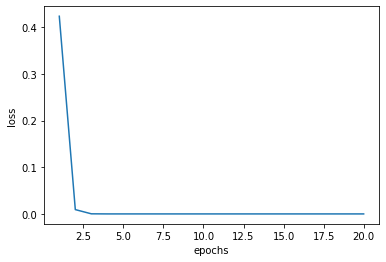

In [45]:
plt.plot(epochs,loss)
plt.xlabel("epochs")
plt.ylabel("loss")

Text(0, 0.5, 'accuracy')

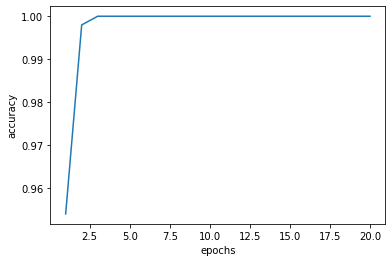

In [46]:
plt.plot(epochs,train_accuracy)
plt.xlabel("epochs")
plt.ylabel("accuracy")

In [47]:
# Do the same things as in churn ANN file ... just same

## Save the model

In [48]:
model.save('spam_test.h5')

## Test the model

In [49]:
ypred=model.predict(x_test)

35/35 [==============================] - 13s 346ms/step


In [50]:
ypred>0.5

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [51]:
y_test

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

## Test the model with random sample

In [52]:
y = model.predict(cv.transform(['Hi tomorrow you come to our home please don\'t forget']))

1/1 [==============================] - 0s 289ms/step


In [53]:
y>0.5

array([[ True]])

In [54]:
y

array([[1.]], dtype=float32)

### To test in new file

In [55]:
text = 'You have won the lottery ... get 50 percent cashback and win rewards worth 5000k ... just give missed call to 999288736.'
text = text.lower() 
text = re.sub('[^a-z]'," ",text)
text =text.split()
text = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
text = ' '.join(text)

In [56]:
y = model.predict(cv.transform([text]))

1/1 [==============================] - 0s 75ms/step


In [57]:
y

array([[1.]], dtype=float32)